### 비지도학습 > 군집화 > DBSCAN

####하이퍼 파라미터

*  eps : 이웃을 정의하기 위한 거리(입실론/epsilon)
*  min_samples : 군집을 정의하기 위한 eps 반경 내 최소 데이터의 개수

1. 실습을 위해 make_blobs 함수를 사용하여 3개의 합성 클러스터 데이터를 만듦
2. sklearn.cluster 패키지의 DBSCAN 객체를 사용하여 군집화를 함.
3. 시각화

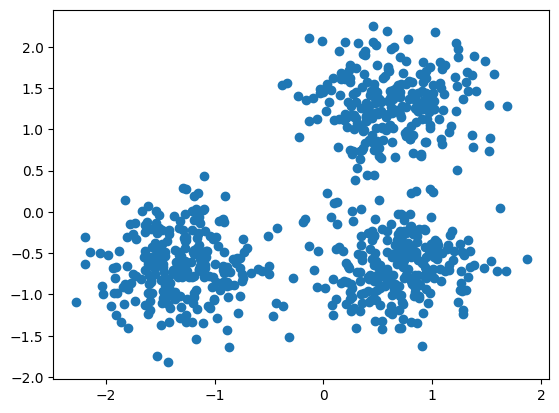

In [4]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#실습용 데이터 생성하기
centers = [ [1,1], [-1,-1], [1,-1] ]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

#데이터 표준화하기
#fit_transform()은 fit()과 transform()을 합한 메소드임
X = StandardScaler().fit_transform(X)

#데이터 시각화하기
plt.scatter(X[:,0], X[:,1])
plt.show()

In [20]:
 import numpy as np
 from sklearn.cluster import DBSCAN
 from sklearn import metrics

 #DBSCAN 모델 정의 및 학습하기
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

 #Noisy samples를 제외한 클러스터 개수 확인하기
 #set은 중복을 제거한 값들의 모음
 n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

 #Noisy samples 개수 확인하기
 n_noise_ = list(labels).count(-1)

 print("Estimated number of clusters : %d" %n_clusters_)
 print("Estimated number of noise points : %d" %n_noise_)


Estimated number of clusters : 3
Estimated number of noise points : 18


“새로운 데이터가 많고, 그 안에 패턴이나 구조가 숨어 있는데
사람이 라벨을 미리 붙이지 않은 상황”
→ 이럴 때 DBSCAN이 알아서 비슷한 애들끼리 묶어줍니다.

💡 DBSCAN이 특히 유용한 이유

라벨이 없어도 된다.
→ 정답(label) 모르는 “관찰 데이터”, “측정 데이터” 분석에 딱임.
예: 센서값, 위치좌표, 이미지 임베딩, 환자 생체데이터 등

군집 개수를 지정할 필요가 없다.
→ KMeans처럼 “3개로 묶어줘!” 하지 않아도
데이터의 밀도 패턴을 보고 자동으로 몇 개의 그룹이 존재하는지 판단합니다.

이상치 자동 감지(Noise Detection)
→ 어디에도 속하지 않는 점들은 -1 (noise) 로 라벨링돼요.
→ 즉, “이건 뭉치에도 안 끼는 이상치야” 라고 알려주는 기능이 내장되어 있음.

In [17]:
labels
unique_lables

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

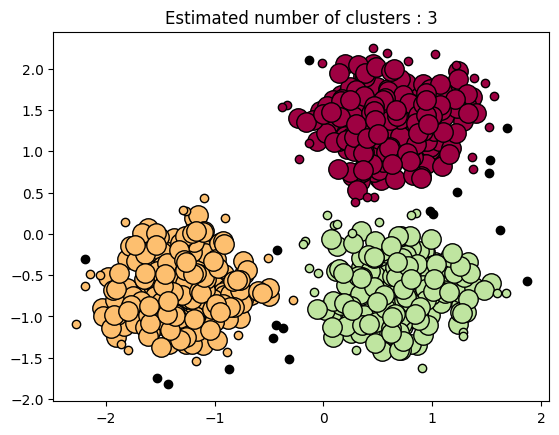

In [33]:
#시각화하기 -> 핵심 데이터 및 경계 데이터는 각각 큰 점과 작은 점으로 시각화. 할당된 클러스터에 따라 색상으로 구분. noise point 태그 지정 샘플은 검은색 처리.

#레이블 유일값 설정
unique_labels = set(labels)

"""
np.zeros_like(labels, dtype=bool) 의 뜻 :

이건 labels와 같은 크기(shape) 를 가지는
“0(또는 False)”으로 채워진 배열을 만드는 코드예요.
[False False False False False False]
"""
core_samples_mask = np.zeros_like(labels, dtype=bool)

"""
db.core_sample_indices_ 의 뜻.

이건 DBSCAN이 찾아낸 핵심 데이터(core points)의 인덱스 리스트예요.
즉, “어떤 점들이 핵심점인지”를 알려줍니다.
"""
core_samples_mask[db.core_sample_indices_] = True

#클러스터 구분 색상 설정하기
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]

#시각화
#unique_labels 철자 자꾸 오타
#if 다음에 들여쓰기 때문에 자료가 안 나왔음.
for k, col in zip(unique_labels, colors) :
    if k == -1 :

      #레이블이 -1로 지정된 Noise Point는 검은색으로 지정하기
      col = [0,0,0,1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

plt.title(f"Estimated number of clusters : {n_clusters_}")
plt.show()




